# Example 2:  Interactive Lecture Notes—Bootstrap Confidence Intervals

Note: This example is a snippet of a larger set of lecture notes on confidence intervals.

To see an example of the bootstrap in action, let's return to the Titanic data set you first explored and cleaned in a homework assignment.  One thing you might be interested in is whether there is a relationship between age and survival.  For example, you might think that children were more likely to survive the shipwreck.  To investigate this, let's construct a confidence interval for the difference in the average ages of those who survived and those who perished.

First, you need to load the cleaned training subset of the Titanic data.  For the sake of this exercise, everyone will use the same data set, which was created by my homework solutions.

In [2]:
/* Reduce log output */
options nosource nonotes;
/* Fetch the file from the website */
filename titanic temp;
proc http
    url="https://raw.githubusercontent.com/sascommunities/sas-global-forum-2019/master/3133-2019-Gaines/titanicTrainClean.csv"
    method="GET"
    out=titanic;
run;
/* Import the file */
proc import
    file=titanic
    out=work.titanicTrainClean replace
    dbms=csv;
run;

Before conducting inference or fitting a statistical model, you should always explore your data visually.  To do this, let's look at histograms of the variable ``age`` for the two survival groups.


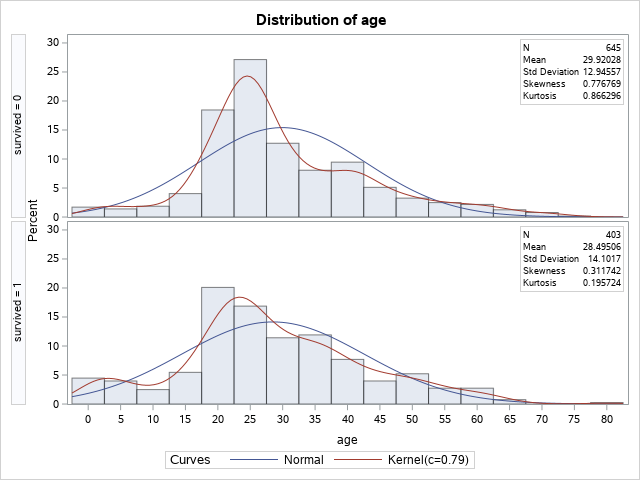

In [3]:
proc univariate data=titanicTrainClean;
   class survived;
   histogram age / midpoints=(0 to 80 by 5) normal kernel;
   inset N Mean Std Skew Kurtosis / position=NE;
   ods select histogram;
run;

Given the shapes of the histograms, in addition to the differences in the group sizes, you might be concerned about the validity of a confidence interval based on the _t_-distribution.  Instead, you can use the bootstrap to construct a nonparametric confidence interval.  You can easily do this by using the new BOOTSTRAP statement in the TTEST procedure. 

Before running the next code cell, be sure to change the ``bdaySeed`` macro variable to match your birthday in DDMMYY format.  

After you obtain your results, discuss them with your neighbors.  Are your intervals exactly the same?  Why or why not?  What does the interval suggest about the average age of those who survived vs. those who perished?  

Calculate another bootstrap confidence interval that uses only $B = 1000$ bootstrap samples.  What happens to the length of the confidence interval, and why?

In [6]:
/* Specify a random seed based on your birthday (MMDDYY format) */
%let bdaySeed = 010484;

proc ttest data=titanicTrainClean;
   class survived;
   var age;
   bootstrap / seed=&bdaySeed nsamples=10000 bootci=bc;
   ods select ConfLimits Bootstrap;
run;